In [12]:
#!pip install -q -U google-generativeai

In [13]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [14]:
import os
os.environ['GOOGLE_API_KEY'] = "Your api key"

In [16]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

In [17]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [19]:
model = genai.GenerativeModel('gemini-pro')
model

 genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
)

In [20]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 129 ms, sys: 18.2 ms, total: 147 ms
Wall time: 11.3 s


In [21]:
to_markdown(response.text)

> The meaning of life is a deep philosophical question that has been pondered by people for centuries. Different cultures, religions, and individuals have proposed various answers to this question, resulting in a diverse range of perspectives. Some of the commonly discussed meanings of life include:
> 
> 1. **Purpose-Driven Meaning:** This view suggests that life has an inherent purpose or goal that gives it meaning. The purpose can vary based on individual beliefs, values, or cultural norms. It could be achieving personal goals, contributing to society, or fulfilling a higher calling.
> 
> 2. **Happiness and Fulfillment:** For many people, the meaning of life lies in experiencing happiness, joy, and fulfillment. This perspective emphasizes the importance of pursuing activities, relationships, and experiences that bring positive emotions and a sense of well-being.
> 
> 3. **Moral and Ethical Values:** Some people find meaning in living a life guided by moral and ethical principles. They believe that acting in accordance with their values, such as compassion, honesty, and fairness, gives their life purpose and significance.
> 
> 4. **Meaning Through Relationships:** Many individuals find meaning and purpose in their relationships with others. Building strong bonds with family, friends, and loved ones can create a sense of belonging, support, and shared experiences that contribute to a meaningful life.
> 
> 5. **Personal Growth and Development:** Others find meaning in the pursuit of personal growth and self-improvement. They believe that learning new things, developing new skills, and challenging themselves to become better versions of themselves gives their life purpose and direction.
> 
> 6. **Cultural and Religious Beliefs:** Cultural and religious beliefs often provide frameworks for understanding the meaning of life. Many people find meaning in following religious rituals, practices, and teachings, which offer a sense of connection to a higher power or a community of believers.
> 
> 7. **Experiencing the Beauty and Wonder of Life:** Some individuals find meaning in simply appreciating the beauty and wonder of the natural world and the universe. They believe that life's purpose is to experience and appreciate the beauty, joy, and awe-inspiring moments that existence offers.
> 
> 8. **Creating a Legacy:** For others, the meaning of life is found in leaving a lasting legacy or impact on the world. They strive to make a difference, whether through their work, art, activism, or contributions to society, that will be remembered and valued by future generations.
> 
> Ultimately, the meaning of life is a personal and subjective matter that varies from individual to individual. There is no one universally accepted answer, as the meaning of life is often shaped by a combination of cultural, personal, and existential factors.

In [22]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a deep philosophical question that has been pondered by people for centuries. Different cultures, religions, and individuals have proposed various answers to this question, resulting in a diverse range of perspectives. Some of the commonly discussed meanings of life include:\n\n1. **Purpose-Driven Meaning:** This view suggests that life has an inherent purpose or goal that gives it meaning. The purpose can vary based on individual beliefs, values, or cultural norms. It could be achieving personal goals, contributing to society, or fulfilling a higher calling.\n\n2. **Happiness and Fulfillment:** For many people, the meaning of life lies in experiencing happiness, joy, and fulfillment. This perspective emphasizes the importance of pursuing activities, relationships, and experiences that bring positive emotions and a sense of well-being.\n\n3. **Moral and Ethical Values:** Some people find meaning in living a life guided by moral and

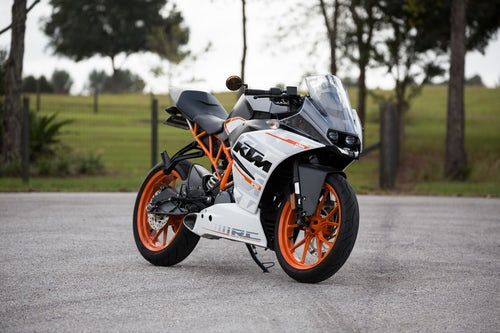

In [27]:
import PIL.Image

img = PIL.Image.open('bike.jpg')
img

In [28]:
model = genai.GenerativeModel('gemini-pro-vision')

In [29]:
response = model.generate_content(img)

to_markdown(response.text)

>  The image shows a white and orange KTM RC 390 motorcycle parked on an asphalt road.

In [30]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the bike in the photo", img], stream=True)
response.resolve()

In [31]:
to_markdown(response.text)

>  Today we're going to take a look at the 2017 KTM RC 390. This is a great bike for beginners and experienced riders alike. 
> 
> It has a 373cc single-cylinder engine that produces 43 horsepower and 27 lb-ft of torque. It has a six-speed transmission and weighs just 302 pounds. The RC 390 has a top speed of 108 mph and can go from 0 to 60 in just 5.1 seconds.
> 
> The RC 390 is a great bike for commuting or just cruising around town. It's also a great bike for track days or racing. If you're looking for a fun and affordable bike, the KTM RC 390 is a great option.